<h1><center>Analysis Framework</center></h1>

In [12]:
# load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md
from pandas.plotting import autocorrelation_plot

In [13]:
# load data
calls = pd.read_csv('../Data/911_calls_for_service_clean_final.csv',index_col='callDateTime',parse_dates=True)
calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)",39.289930,-76.612346
2015-07-13 10:47:00,Medium,CD,911 NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)",39.290674,-76.607160
2015-07-13 10:42:00,Medium,CD,911 NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)",39.289891,-76.612072
2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)",39.298516,-76.618475
2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)",39.311213,-76.676315


In [14]:
# function to set the label of subplots
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -4), ha='right', va='top', size=14, 
                xycoords='axes fraction', textcoords='offset points') 
    
# function to create autocorrelation chart
def DrawAutoCorrelation(data, title, firsttitle, secondtitle, thirdtitle, dateformat = 'hours'):
    
    fig, axes = plt.subplots(nrows=3, figsize=(15, 12))
    
    # using tigh layout so there is no space between title and sub plots
    fig.tight_layout()
    
    # set the tilte for graph
    fig.suptitle(title, fontsize=20)
    
    label(axes[0], firsttitle)
    axes[0].plot(data)

    if (dateformat == 'days'):
        xfmt = md.DateFormatter('%e')
    elif (dateformat == 'month'):
        xfmt = md.DateFormatter('%b, %Y')
    else:
        xfmt = md.DateFormatter('%H:%M')
        
    axes[0].xaxis.set_major_formatter(xfmt)

    # create autocorrelation chart from metplotlib
    axes[1].acorr(data, maxlags=data.size-1)
    label(axes[1], secondtitle)
    
    # create autocorrelation char from panda through autocorrelation_plot method
    label(axes[2], thirdtitle)
    pd.plotting.autocorrelation_plot(data, ax=axes[2])    
    plt.show()

# Function to set explode value for pie slice
def isExplode(x):
    if x == True:
        return 0.1
    else:
        return 0
    
# Function to draw pie chart and explode the slice with max size
def DrawPieChart(data, title, savefile = np.nan):
    #convert to dataframe
    data = pd.Series.to_frame(data);
    
    data['Size'] = data / data.sum() * 100
    
    # Create new attribute to set the explode slice
    data['Explode'] = data['Size'].max() == data['Size']    
    data['Explode'] = data['Explode'].apply(isExplode)
    
    fig1, ax1 = plt.subplots(figsize=(15,8))
    ax1.pie(data['Size'], explode = data['Explode'], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(data.index, loc="upper right")
    plt.title(title, fontsize=20)
    plt.tight_layout()
    if (savefile != np.nan):
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()
    
    print(data)

# set chart properties
def SetChartProperties(ax, xlabel, ylabel, labeltext):
    ax.grid('on', which='minor', axis='x' )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    label(ax, labeltext)

In [6]:
# load [accident] records only
accident_calls = calls.loc[calls.description.str.contains('ACCIDENT')==True]

In [92]:
accident_calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 10:49:00,Low,SW,AUTO ACCIDENT,P151941010,3100 WILKENS AV,"(39.2756929,-76.6664179)",39.275693,-76.666418
2015-07-13 10:51:00,Low,CD,AUTO ACCIDENT,P151941017,W LOMBARD ST/S GREENE ST,"(39.287402,-76.623583)",39.287402,-76.623583
2015-07-13 10:55:00,Medium,SW,AUTO ACCIDENT,P151941036,1200 COOKS LN,"(39.2990896,-76.7111397)",39.299090,-76.711140
2015-07-13 10:58:00,Low,NW,AUTO ACCIDENT,P151941042,5400 REISTERSTOWN RD,"(39.3460230,-76.6883340)",39.346023,-76.688334
2015-07-13 11:06:00,Low,NE,AUTO ACCIDENT,P151941062,E COLD SPRING LN/HARFORD RD,"(39.342808,-76.569129)",39.342808,-76.569129


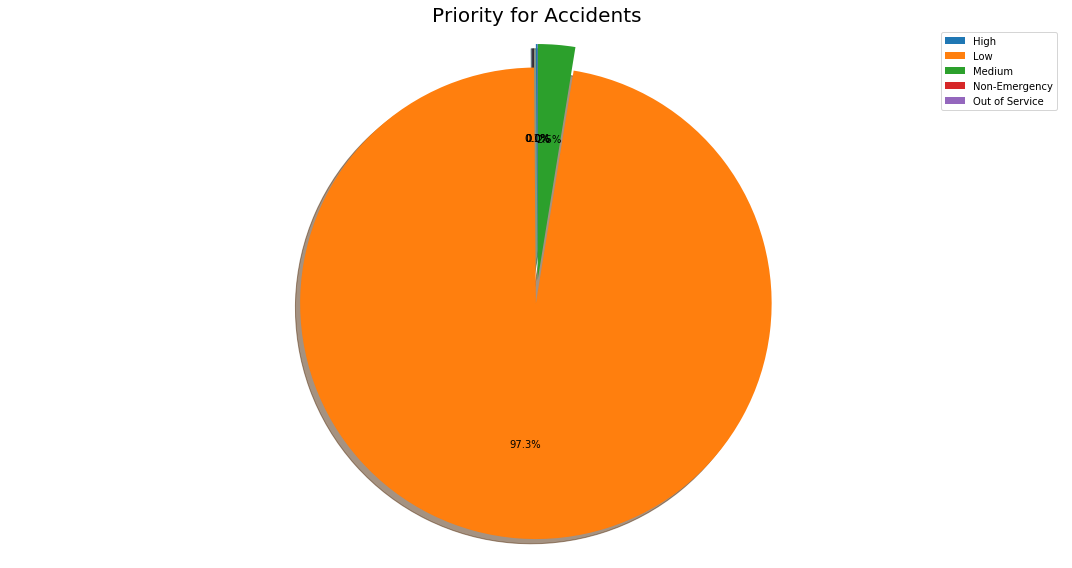

                callNumber       Size  Explode
priority                                      
High                   147   0.124754      0.0
Low                 114668  97.314821      0.1
Medium                3001   2.546846      0.0
Non-Emergency            2   0.001697      0.0
Out of Service          14   0.011881      0.0


In [16]:
# draw priority chart
DrawPieChart(accident_calls.groupby('priority').callNumber.count(), \
             'Priority for Accidents', 'accident-priority.png')

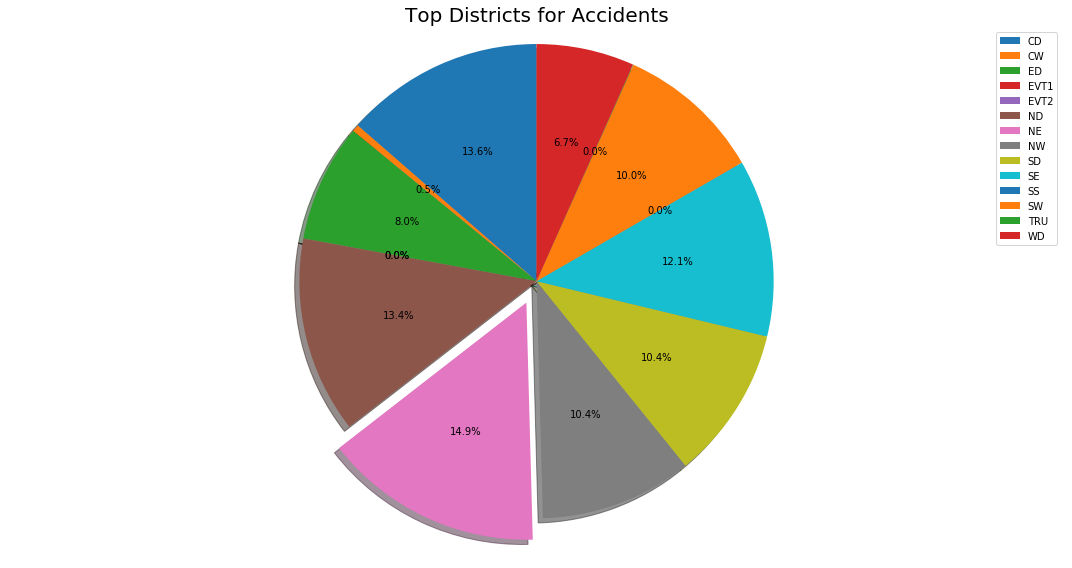

          callNumber       Size  Explode
district                                
CD             16020  13.595628      0.0
CW               566   0.480345      0.0
ED              9474   8.040261      0.0
EVT1               8   0.006789      0.0
EVT2               1   0.000849      0.0
ND             15774  13.386856      0.0
NE             17578  14.917849      0.1
NW             12234  10.382579      0.0
SD             12300  10.438591      0.0
SE             14241  12.085851      0.0
SS                 2   0.001697      0.0
SW             11740   9.963338      0.0
TRU               37   0.031401      0.0
WD              7857   6.667968      0.0


In [17]:
# draw top discricts
DrawPieChart(accident_calls.groupby('district').callNumber.count(), \
             'Top Districts for Accidents', 'accident-district')

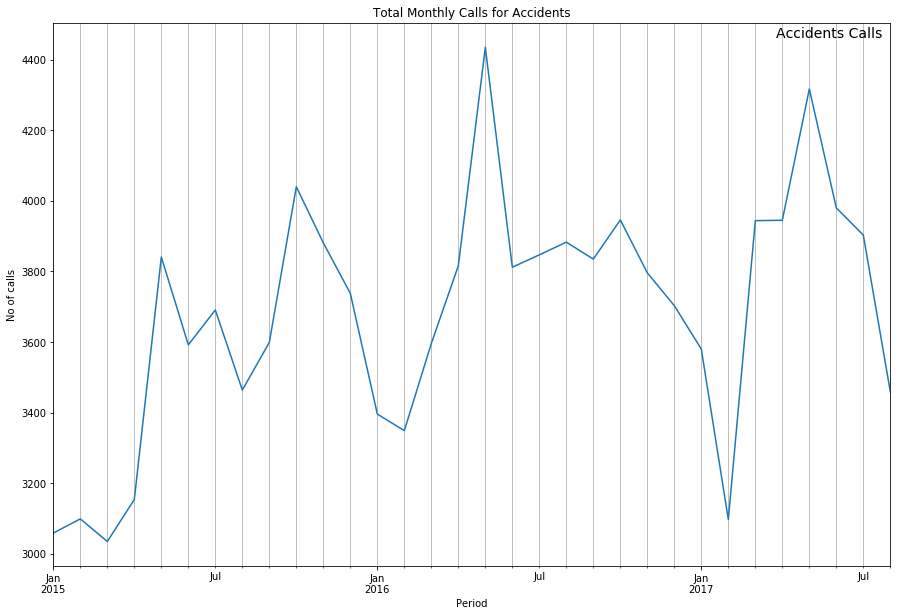

In [62]:
# monthly chart line chart for accidents
ax = accident_calls.resample('M').callNumber.count().plot(figsize=(15,10), title="Total Monthly Calls for Accidents")
SetChartProperties(ax, 'Period', 'No of calls', 'Accidents Calls')

<center><b>May 2016 is highest</b></center>

<b>Related news May 2016 bus accident</b><br>
http://baltimore.cbslocal.com/2016/05/26/several-students-injured-in-baltimore-school-bus-crash/


<b>Road accidents death increase from 2015 to 2016</b><br>
http://www.mdot.maryland.gov/News/Releases2017/2016_April_26_MDOT_Releases_2016_Roadway_Deaths

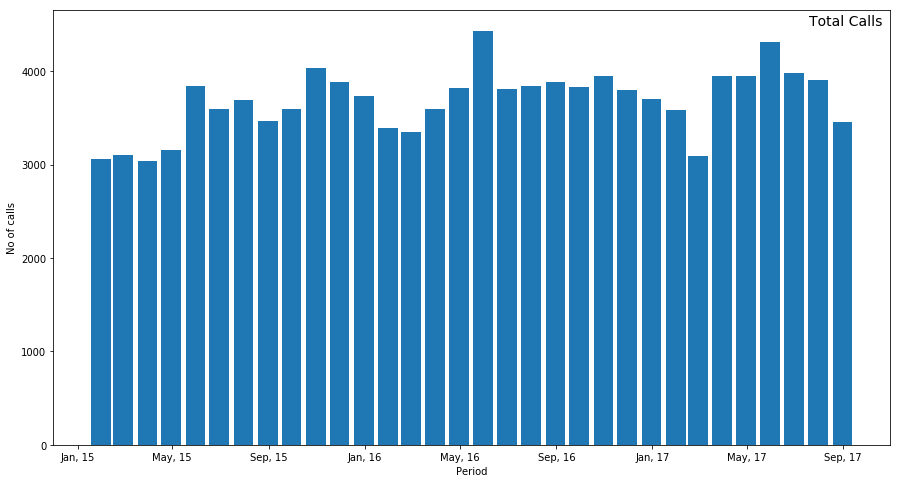

In [60]:
# monthly bar chart for accidents
df = pd.Series.to_frame(accident_calls.resample('M').callNumber.count())
fig, ax = plt.subplots(figsize=(15, 8))
ax.xaxis.set_major_formatter(md.DateFormatter('%b, %y'))
ax.bar(df.index, df['callNumber'], width=25, align='center')
SetChartProperties(ax, 'Period', 'No of calls', 'Total Calls')


In [64]:
import statsmodels.api as sm

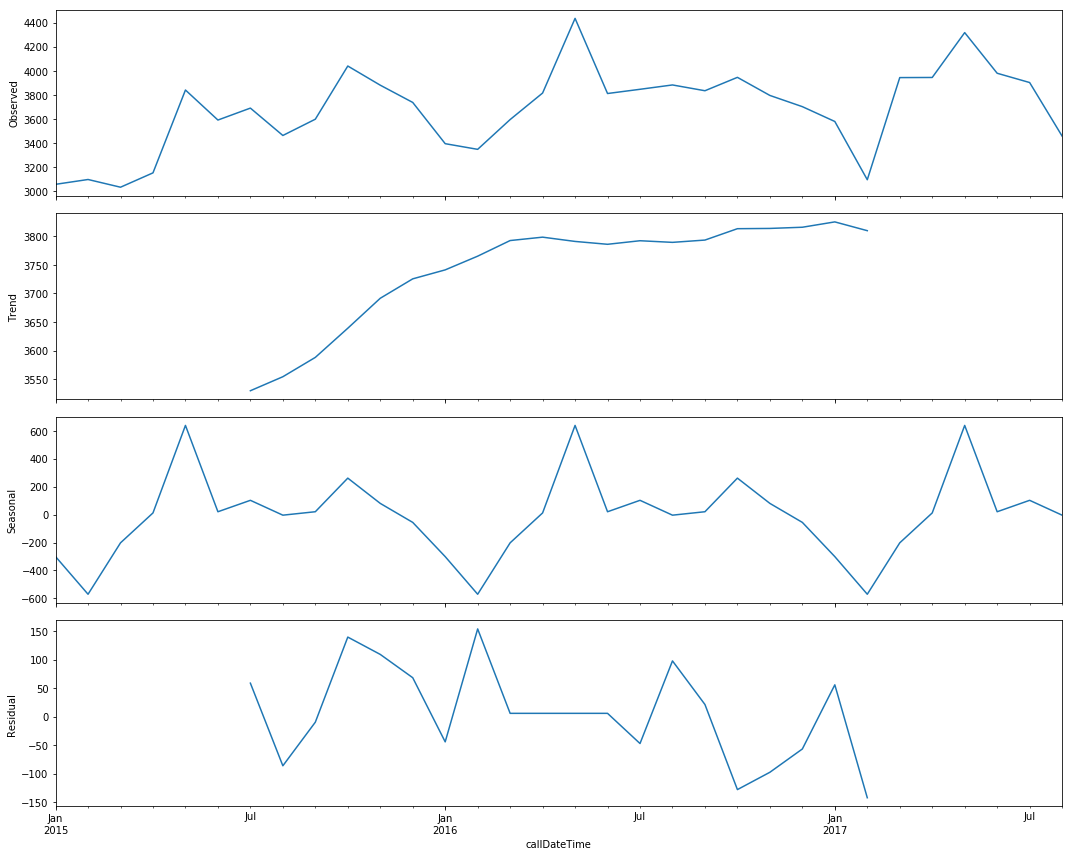

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12

decomposition = sm.tsa.seasonal_decompose(accident_calls.resample('M').callNumber.count(), model='additive')
fig = decomposition.plot()
plt.show()

<center><b>STL: A Seasonal-Trend Decomposition Procedure Based on Loess</b></center>

The plot above clearly shows the upwards trend of total accidents calls, along with its yearly seasonality.<br><br>
<b>More information about above chart, please check the following link</b><br>
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3<br>
https://www.wessa.net/download/stl.pdf

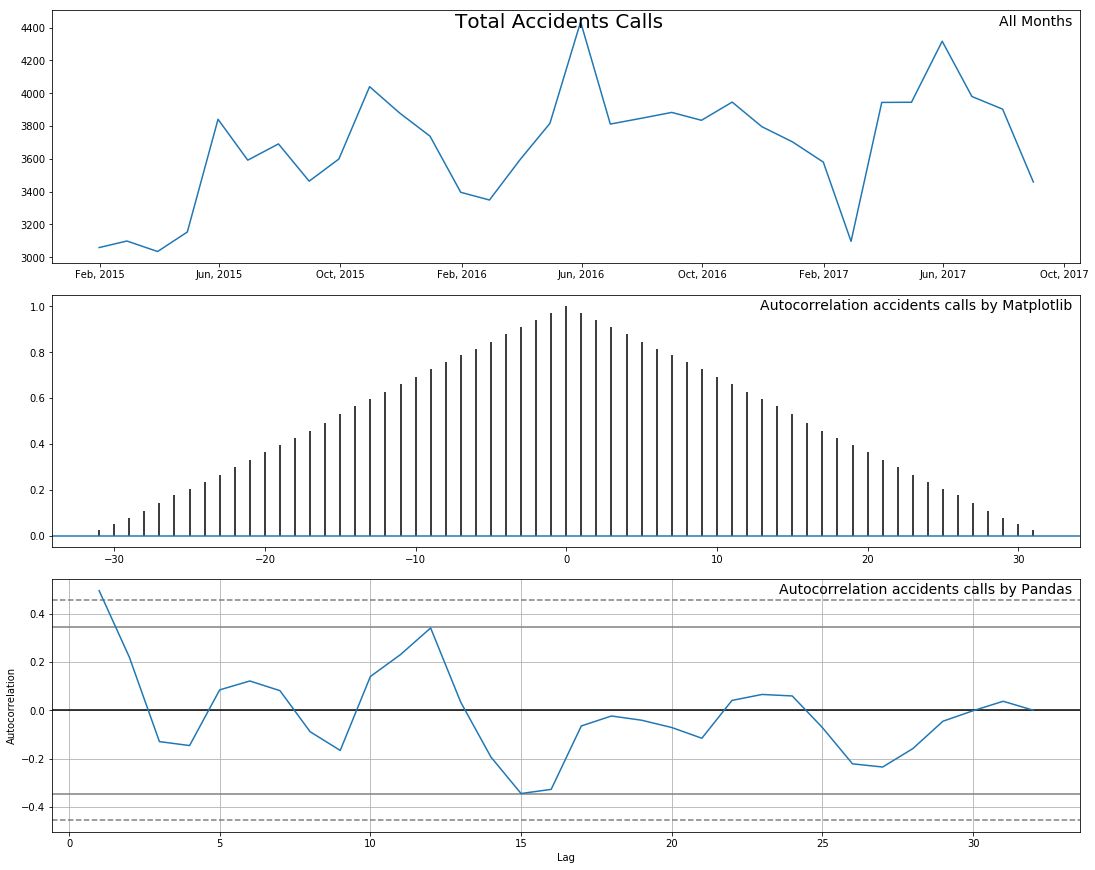

In [78]:
# draw auto correlation 
DrawAutoCorrelation(accident_calls.resample('M').callNumber.count().astype('float64'), \
                    'Total Accidents Calls', 'All Months', \
                    'Autocorrelation accidents calls by Matplotlib', \
                    'Autocorrelation accidents calls by Pandas', dateformat='month')

Above accidents calls are not correlated.

In [171]:
# create data for 2015/2016 calls
accidents2015 = accident_calls['2015'].resample('M').callNumber.count().reset_index()
accidents2015['month'] = accidents2015['callDateTime']
accidents2015['month'] = accidents2015['month'].apply(lambda x: x.month)
accidents2015.drop('callDateTime', axis=1, inplace=True)
accidents2015.columns = ['2015', 'month']

accidents2016 = accident_calls['2016'].resample('M').callNumber.count().reset_index()
accidents2016['month'] = accidents2016['callDateTime']
accidents2016['month'] = accidents2016['month'].apply(lambda x: x.month)
accidents2016.drop('callDateTime', axis=1, inplace=True)
accidents2016.columns = ['2016', 'month']

mergeaccidents = pd.merge(accidents2015, accidents2016)
mergeaccidents.set_index('month', inplace=True)

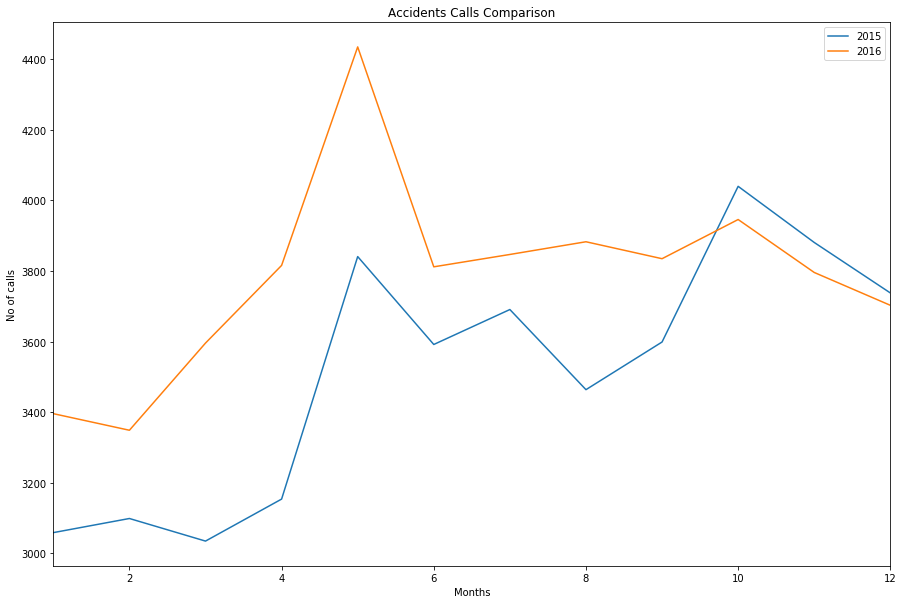

In [172]:
# draw two year comparasion chart
ax = mergeaccidents.plot(figsize=(15,10), title="Accidents Calls Comparison")
SetChartProperties(ax, 'Months', 'No of calls', '')

In [19]:
#let's create daily data
daily_data = accident_calls.resample('D').callNumber.count()
#convert to dataframe
daily_data = pd.DataFrame(daily_data)
# add weekdays column
daily_data['Weekdays'] = daily_data.index.weekday_name

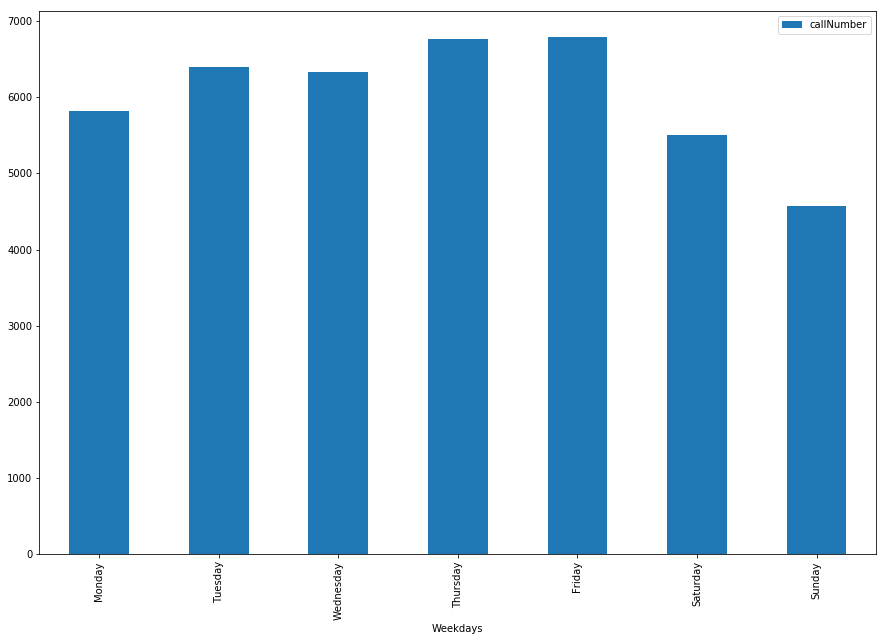

In [20]:
# draw weekdays chart for 2015 year
daily_data['2015'].groupby('Weekdays')\
.sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\
    .plot(kind='bar', figsize=(15,10))

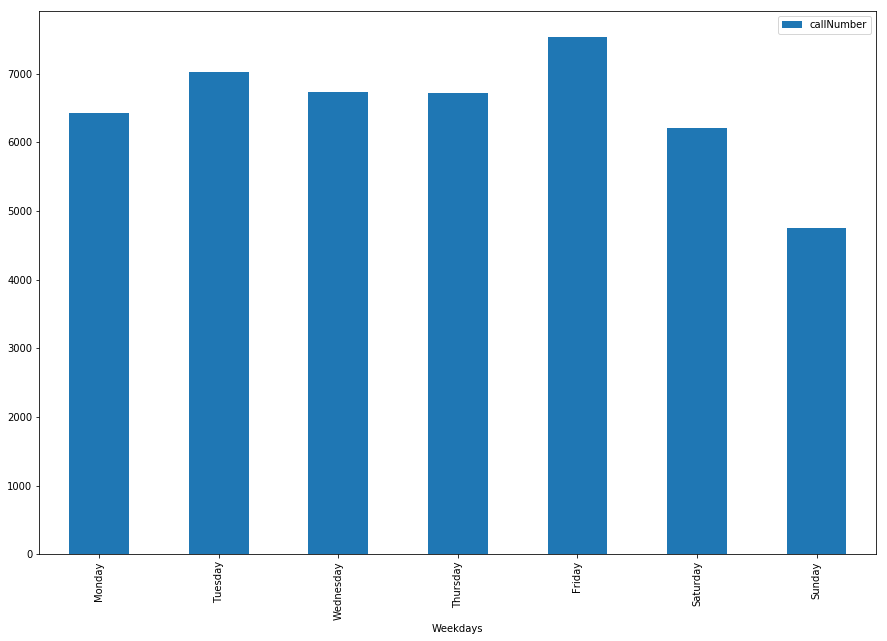

In [21]:
# draw weekdays chart for 2016 year
daily_data['2016'].groupby('Weekdays')\
.sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\
    .plot(kind='bar', figsize=(15,10))